In [2]:
import pickle
from pathlib import Path

import pandas as pd

# ------------------------------------------------------------------
# 1. chemin du pickle (adapter si besoin)
PKL = Path("C:/Users/Dell/projects/regional_flex/results/full_year.pkl")

# 2. chargement
with PKL.open("rb") as f:
    res = pickle.load(f)

# ------------------------------------------------------------------
# 3. reconstruction d’un DataFrame « long » ⇢ « large »
#    (index = pas de temps, colonnes = variables)
first_var = next(iter(res["variables"].values()))
idx = pd.date_range("2022-01-01", periods=len(first_var), freq="30min")

# Existing code...
table = {}
for var_name, series_dict in res["variables"].items():
    s = pd.Series(series_dict).reindex(range(len(idx)), fill_value=0.0)
    table[var_name] = s.values

# NEW: Add dual variables (nodal prices) if present
if "dual_variables" in res:
    for region, price_series in res["dual_variables"].items():
        # price_series is likely a pandas Series or dict
        s = pd.Series(price_series).reindex(range(len(idx)), fill_value=0.0)
        table[f"nodal_price_{region}"] = s.values

df = pd.DataFrame(table, index=idx)
# Renomme explicitement la première colonne en 'timestamp'
df.index.name = "timestamp"
df.to_csv("C:/Users/Dell/projects/regional_flex/full_year.csv")
print(df.shape)

(17473, 116)


In [3]:
df.head()

,dispatch_hydro_Auvergne_Rhone_Alpes,uc_hydro_Auvergne_Rhone_Alpes,startup_hydro_Auvergne_Rhone_Alpes,dispatch_nuclear_Auvergne_Rhone_Alpes,uc_nuclear_Auvergne_Rhone_Alpes,startup_nuclear_Auvergne_Rhone_Alpes,dispatch_thermal_gas_Auvergne_Rhone_Alpes,uc_thermal_gas_Auvergne_Rhone_Alpes,startup_thermal_gas_Auvergne_Rhone_Alpes,dispatch_thermal_fuel_Auvergne_Rhone_Alpes,...,flow_out_Occitanie_Auvergne_Rhone_Alpes,flow_out_Occitanie_Nouvelle_Aquitaine,flow_out_Occitanie_Provence_Alpes_Cote_dAzur,flow_out_Provence_Alpes_Cote_dAzur_Auvergne_Rhone_Alpes,flow_out_Provence_Alpes_Cote_dAzur_Nouvelle_Aquitaine,flow_out_Provence_Alpes_Cote_dAzur_Occitanie,nodal_price_Auvergne_Rhone_Alpes,nodal_price_Nouvelle_Aquitaine,nodal_price_Occitanie,nodal_price_Provence_Alpes_Cote_dAzur
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,6210.397,1.0,1.0,2119.465,1.0,1.0,44.8,1.0,1.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,87.2,95.0,119.3617,120.0
2022-01-01 00:30:00,6107.770,1.0,0.0,2112.650,1.0,0.0,39.2,1.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,87.2,95.0,119.3617,120.0
2022-01-01 01:00:00,6005.143,1.0,0.0,2105.835,1.0,0.0,33.6,1.0,0.0,0.0,...,0.0,0.0,120.093,0.0,0.0,0.0,87.2,95.0,89.3000,120.0
2022-01-01 01:30:00,5902.516,1.0,0.0,2099.020,1.0,0.0,28.0,1.0,0.0,0.0,...,0.0,0.0,84.062,0.0,0.0,0.0,87.2,95.0,89.3000,120.0
2022-01-01 02:00:00,5799.889,1.0,0.0,2092.205,1.0,0.0,22.4,1.0,0.0,0.0,...,0.0,0.0,33.031,0.0,0.0,0.0,87.2,95.0,89.3000,120.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Rechargement du CSV avec parse des dates
df = pd.read_csv("full_year.csv", index_col=0, parse_dates=True)

# Affichage des premières lignes
df.head()


,dispatch_hydro_Auvergne_Rhone_Alpes,uc_hydro_Auvergne_Rhone_Alpes,startup_hydro_Auvergne_Rhone_Alpes,dispatch_nuclear_Auvergne_Rhone_Alpes,uc_nuclear_Auvergne_Rhone_Alpes,startup_nuclear_Auvergne_Rhone_Alpes,dispatch_thermal_gas_Auvergne_Rhone_Alpes,uc_thermal_gas_Auvergne_Rhone_Alpes,startup_thermal_gas_Auvergne_Rhone_Alpes,dispatch_thermal_fuel_Auvergne_Rhone_Alpes,...,flow_out_Occitanie_Auvergne_Rhone_Alpes,flow_out_Occitanie_Nouvelle_Aquitaine,flow_out_Occitanie_Provence_Alpes_Cote_dAzur,flow_out_Provence_Alpes_Cote_dAzur_Auvergne_Rhone_Alpes,flow_out_Provence_Alpes_Cote_dAzur_Nouvelle_Aquitaine,flow_out_Provence_Alpes_Cote_dAzur_Occitanie,nodal_price_Auvergne_Rhone_Alpes,nodal_price_Nouvelle_Aquitaine,nodal_price_Occitanie,nodal_price_Provence_Alpes_Cote_dAzur
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,6210.397,1.0,1.0,2119.465,1.0,1.0,44.8,1.0,1.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,87.2,95.0,119.3617,120.0
2022-01-01 00:30:00,6107.770,1.0,0.0,2112.650,1.0,0.0,39.2,1.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,87.2,95.0,119.3617,120.0
2022-01-01 01:00:00,6005.143,1.0,0.0,2105.835,1.0,0.0,33.6,1.0,0.0,0.0,...,0.0,0.0,120.093,0.0,0.0,0.0,87.2,95.0,89.3000,120.0
2022-01-01 01:30:00,5902.516,1.0,0.0,2099.020,1.0,0.0,28.0,1.0,0.0,0.0,...,0.0,0.0,84.062,0.0,0.0,0.0,87.2,95.0,89.3000,120.0
2022-01-01 02:00:00,5799.889,1.0,0.0,2092.205,1.0,0.0,22.4,1.0,0.0,0.0,...,0.0,0.0,33.031,0.0,0.0,0.0,87.2,95.0,89.3000,120.0


Nodal price columns found: ['nodal_price_Auvergne_Rhone_Alpes', 'nodal_price_Nouvelle_Aquitaine', 'nodal_price_Occitanie', 'nodal_price_Provence_Alpes_Cote_dAzur']
                     nodal_price_Auvergne_Rhone_Alpes  \
timestamp                                               
2022-01-01 00:00:00                              87.2   
2022-01-01 00:30:00                              87.2   
2022-01-01 01:00:00                              87.2   
2022-01-01 01:30:00                              87.2   
2022-01-01 02:00:00                              87.2   

                     nodal_price_Nouvelle_Aquitaine  nodal_price_Occitanie  \
timestamp                                                                    
2022-01-01 00:00:00                            95.0               119.3617   
2022-01-01 00:30:00                            95.0               119.3617   
2022-01-01 01:00:00                            95.0                89.3000   
2022-01-01 01:30:00                           

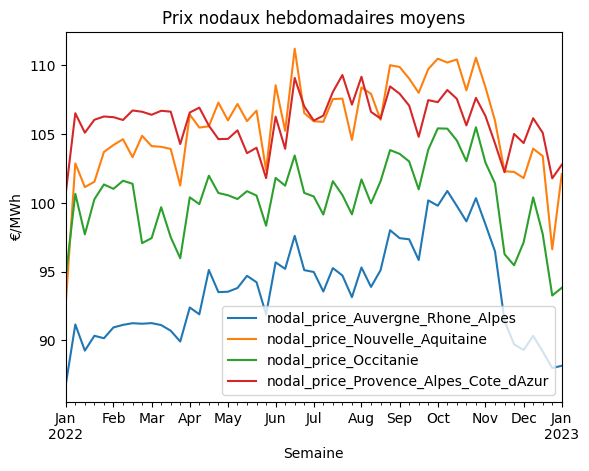

In [5]:
import matplotlib.pyplot as plt

# Ensure the index is a DateTimeIndex (should be if you loaded with parse_dates and index_col=0)
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)
df.index.name = "timestamp"  # Optional, for clarity

nodal_cols = [col for col in df.columns if col.startswith('nodal_price')]
print("Nodal price columns found:", nodal_cols)
print(df[nodal_cols].head())

# Only plot if there are nodal price columns and the index is a DateTimeIndex
if nodal_cols and isinstance(df.index, pd.DatetimeIndex):
    df[nodal_cols].resample("W").mean().plot(title='Prix nodaux hebdomadaires moyens')
    plt.ylabel("€/MWh")
    plt.xlabel("Semaine")
    plt.show()
else:
    print("No nodal price columns found or DataFrame index is not a DateTimeIndex.")

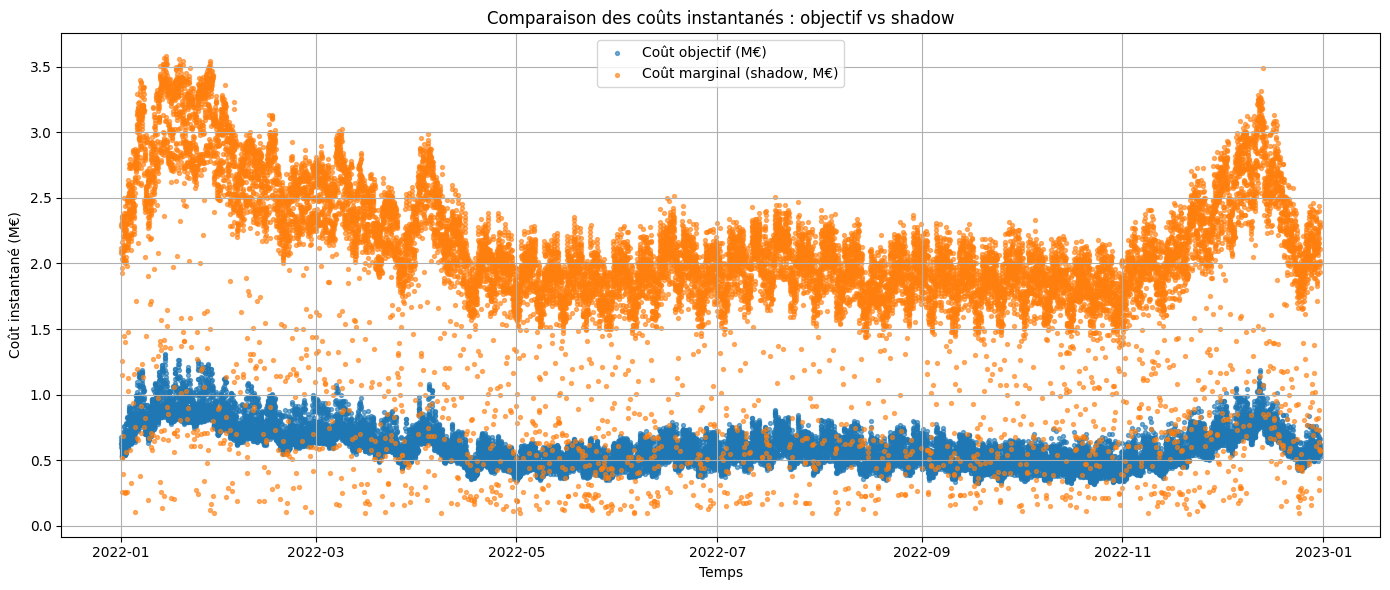

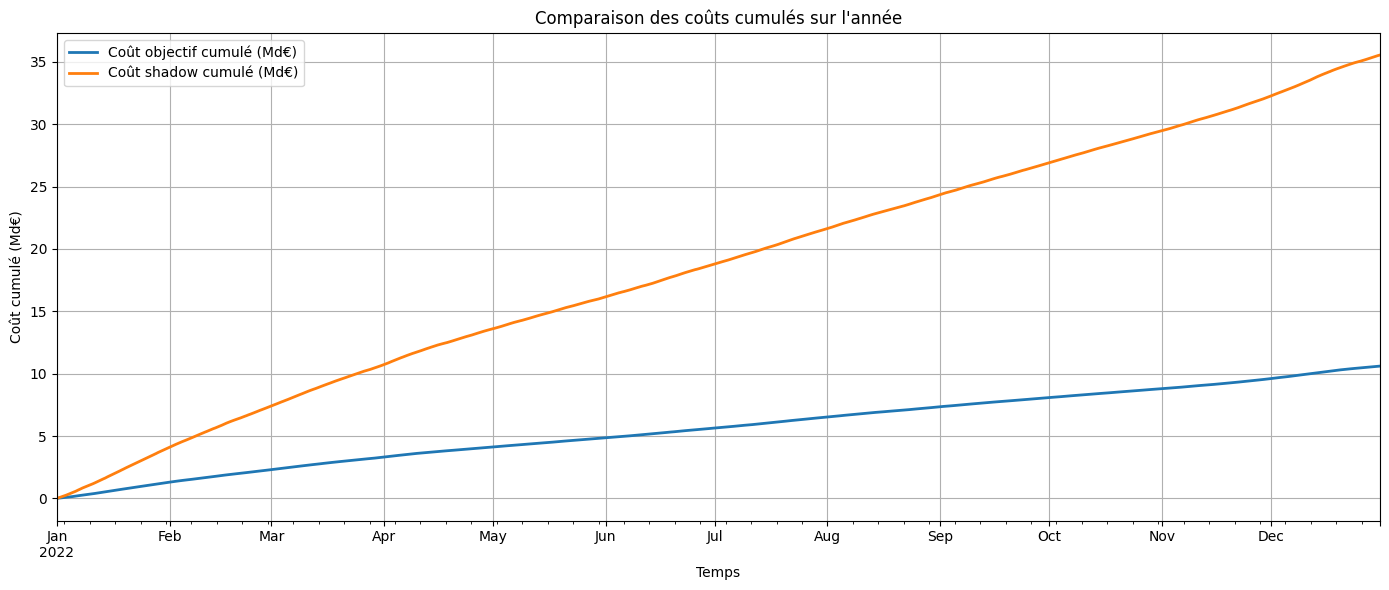

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml


# Charger les coûts depuis le fichier YAML
with open("config/config_master.yaml", "r") as f:
    config = yaml.safe_load(f)

regions = config["regions"]
regional_costs = config["regional_costs"]
costs = config["costs"]

# Technologies et coûts
dispatch_techs = ["hydro", "nuclear", "thermal_gas", "thermal_fuel", "biofuel"]
storage_techs = ["STEP", "batteries"]

# 1. Coût objectif instantané
objective_costs = []

for t in df.index:
    total = 0
    for region in regions:
        for tech in dispatch_techs:
            col = f"dispatch_{tech}_{region}"
            if col in df.columns:
                total += df.at[t, col] * regional_costs[region][tech]
        for st in storage_techs:
            for action in ["charge", "discharge"]:
                col = f"storage_{action}_{st}_{region}"
                if col in df.columns:
                    cost_key = f"storage_{action}"
                    total += df.at[t, col] * costs[cost_key]
        dr_col = f"demand_response_{region}"
        if dr_col in df.columns:
            total += abs(df.at[t, dr_col]) * costs["demand_response"]
        for dest in regions:
            if region != dest:
                flow_col = f"flow_out_{region}_{dest}"
                if flow_col in df.columns:
                    total += df.at[t, flow_col] * costs["exchange"]
    objective_costs.append(total)

df["objective_cost"] = objective_costs

# 2. Coût marginal théorique basé sur les prix nodaux × demande estimée
shadow_costs = []
for t in df.index:
    shadow_total = 0
    for region in regions:
        nodal_price = df.at[t, f"nodal_price_{region}"]
        dispatch_cols = [f"dispatch_{tech}_{region}" for tech in dispatch_techs if f"dispatch_{tech}_{region}" in df.columns]
        discharge_cols = [f"storage_discharge_{st}_{region}" for st in storage_techs if f"storage_discharge_{st}_{region}" in df.columns]
        charge_cols = [f"storage_charge_{st}_{region}" for st in storage_techs if f"storage_charge_{st}_{region}" in df.columns]
        demand = df.loc[t, dispatch_cols].sum() + df.loc[t, discharge_cols].sum() - df.loc[t, charge_cols].sum()
        shadow_total += demand * nodal_price
    shadow_costs.append(shadow_total)

df["shadow_cost"] = shadow_costs

# 3. Visualisation comparative instantanée
# Assumes `df` is already defined in the session
plt.figure(figsize=(14, 6))

# Scatter plots with small dots and moderate transparency
plt.scatter(df.index, df["objective_cost"] / 1e6, s=8, alpha=0.6, label="Coût objectif (M€)")
plt.scatter(df.index, df["shadow_cost"] / 1e6, s=8, alpha=0.6, label="Coût marginal (shadow, M€)")

plt.xlabel("Temps")
plt.ylabel("Coût instantané (M€)")
plt.title("Comparaison des coûts instantanés : objectif vs shadow")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Visualisation cumulative
cumulative_df = df[["objective_cost", "shadow_cost"]].cumsum() / 1e9
cumulative_df.columns = ["Coût objectif cumulé (Md€)", "Coût shadow cumulé (Md€)"]
cumulative_df.plot(figsize=(14, 6), linewidth=2)
plt.title("Comparaison des coûts cumulés sur l'année")
plt.xlabel("Temps")
plt.ylabel("Coût cumulé (Md€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
print(f'Objective cost: {df["objective_cost"].sum()}')
print(f'Shadow cost: {df["shadow_cost"].sum()}')
print(f'Objective cost - Shadow cost: {df["objective_cost"].sum() - df["shadow_cost"].sum()}')
print(f'Percentage diff: {((df["objective_cost"].sum() - df["shadow_cost"].sum()) / df["objective_cost"].sum()) * 100}%')


Objective cost: 10605138899.264854
Shadow cost: 35547899655.96748
Objective cost - Shadow cost: -24942760756.70263
Percentage diff: -235.19504075926488%


Indicateurs_volatilité


C:\Users\Dell\AppData\Local\Temp\ipykernel_6600\3419238834.py:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_sigma = price.rolling('24H').std().rename('σ_24h_M€')


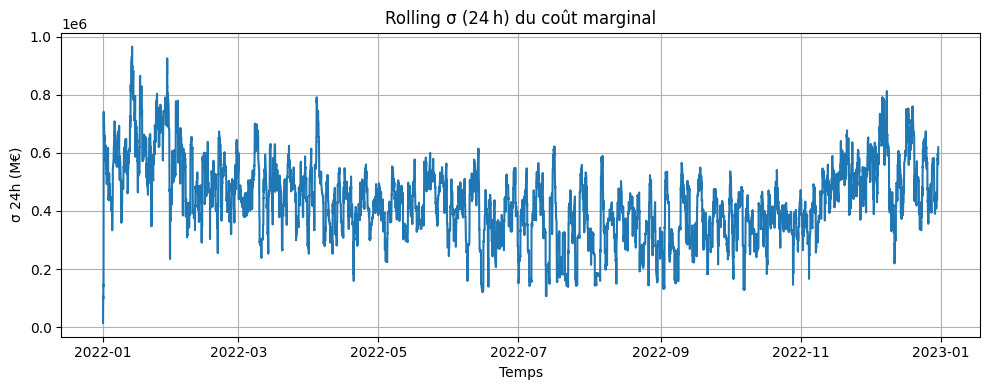

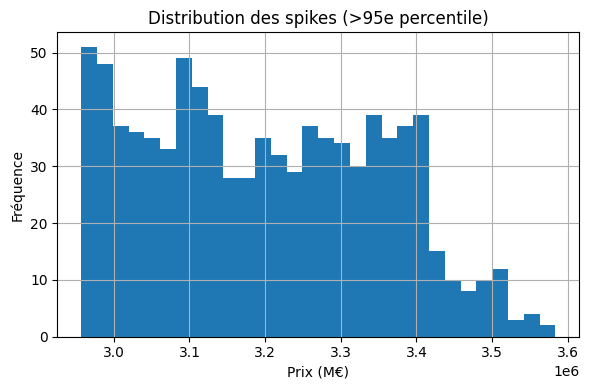

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ------------------------------------------------------------------
# 1. Charge le DataFrame `df` si présent dans l'environnement
#    (sinon demande à l'utilisateur d'importer ses données)
# ------------------------------------------------------------------
if 'df' not in globals():
    print("❗️ Le DataFrame `df` n'est pas trouvé. "
          "Charge-le avant d'exécuter ce notebook (par ex. via pd.read_csv).")
else:
    # ------------------------------------------------------------------
    # 2. Prépare la série de prix : ici on utilise la colonne 'shadow_cost'
    #    (en M€) à titre d'exemple. Ajuste si tu as une vraie série de prix !
    # ------------------------------------------------------------------
    price = df['shadow_cost']  # déjà en M€ selon la figure précédente
    price.name = 'price_M€'

    # Assure-toi que l'index est de type datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # ------------------------------------------------------------------
    # 3. Rolling sigma (24 h glissantes)
    # ------------------------------------------------------------------
    rolling_sigma = price.rolling('24H').std().rename('σ_24h_M€')

    # ------------------------------------------------------------------
    # 4. Coefficient de variation (CV) global
    # ------------------------------------------------------------------
    cv_global = price.std() / price.mean()

    # ------------------------------------------------------------------
    # 5. Spikes : seuil 95 %, % d’heures au‑dessus
    # ------------------------------------------------------------------
    threshold_95 = price.quantile(0.95)
    spikes_pct = (price > threshold_95).mean() * 100  # en %

    # Résumé dans un petit DataFrame
    summary = pd.DataFrame({
        'CV_global': [cv_global],
        'seuil_95pct(M€)': [threshold_95],
        '%_heures_spikes': [spikes_pct]
    })

    import ace_tools_open as tools; tools.display_dataframe_to_user("Indicateurs_volatilité", summary)

    # ------------------------------------------------------------------
    # 6. Figure : rolling σ sur l’année
    # ------------------------------------------------------------------
    plt.figure(figsize=(10, 4))
    plt.plot(rolling_sigma.index, rolling_sigma)
    plt.xlabel("Temps")
    plt.ylabel("σ 24h (M€)")
    plt.title("Rolling σ (24 h) du coût marginal")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ------------------------------------------------------------------
    # 7. Histogramme des spikes (valeurs > seuil 95 %)
    # ------------------------------------------------------------------
    plt.figure(figsize=(6, 4))
    plt.hist(price[price > threshold_95], bins=30)
    plt.xlabel("Prix (M€)")
    plt.ylabel("Fréquence")
    plt.title("Distribution des spikes (>95e percentile)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
import numpy as np

exchange_matrix = pd.DataFrame(0, index=regions, columns=regions)

for i in regions:
    for j in regions:
        if i == j:
            continue
        col = f'flow_out_{i}_{j}'
        if col in df.columns:
            exchange_matrix.loc[i, j] = df[col].sum()

# Matrice nette : exportations - importations
net_exchange = exchange_matrix.subtract(exchange_matrix.T)
net_exchange.style.background_gradient(cmap='RdBu', axis=None)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6600\2026516258.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80154.61882091' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchange_matrix.loc[i, j] = df[col].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_6600\2026516258.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '560686.220764754' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchange_matrix.loc[i, j] = df[col].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_6600\2026516258.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10808724.38735965' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  exchange_ma

,Auvergne_Rhone_Alpes,Nouvelle_Aquitaine,Occitanie,Provence_Alpes_Cote_dAzur
Auvergne_Rhone_Alpes,0.000000,-13674.300108,551706.094551,10807925.780291
Nouvelle_Aquitaine,13674.300108,0.000000,-41979.162352,2239773.316320
Occitanie,-551706.094551,41979.162352,0.000000,2633080.177385
Provence_Alpes_Cote_dAzur,-10807925.780291,-2239773.316320,-2633080.177385,0.000000


,Décomposition du surplus
Surplus total (M€),24942.8
Congestion réseau (M€),23.9
DR saturée (M€),24099.7
Stockage saturé (M€),2.9
Reste (M€),816.2


T‑test : t = 385.91,  p‑value = 0.00e+00
Wilcoxon : W = 317248, p‑value = 0.00e+00


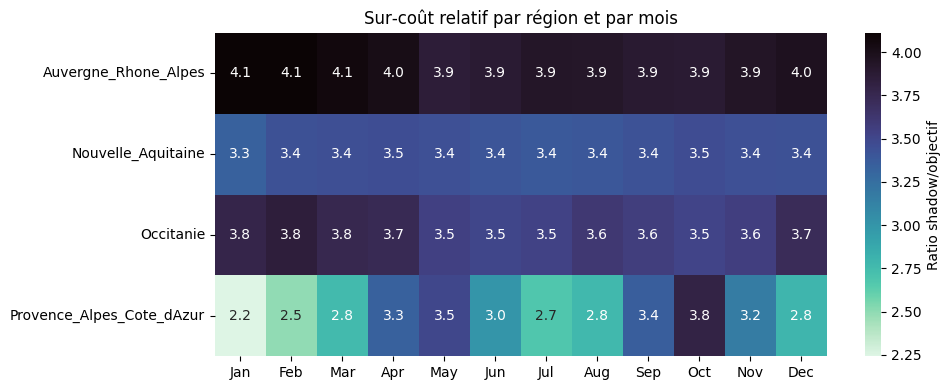

In [19]:
# %% [markdown]
# # 📊 Cellule 1 – Décomposition du surplus par contrainte active  
# ---
# Cette cellule calcule, pour chaque pas de temps :
# 1. le surplus Δ = shadow – objectif (€) ;  
# 2. indique si **(a)** une liaison inter‑régionale est saturée, **(b)** la DR atteint sa limite,
#    **(c)** la puissance de (dé)charge d’un stockage est saturée.  
# Puis elle ventile le surplus annuel entre ces trois catégories et « reste ».
#
# **Pré‑requis :**  
# * `df` : DataFrame horaire contenant les colonnes techno + `objective_cost`, `shadow_cost`.  
# * `config` : dictionnaire YAML (chargé comme précédemment).  
#
import pandas as pd
import yaml

# --- (re)charger YAML si besoin ------------------------------------------------
with open('config/config_master.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

regions   = cfg['regions']
transport = cfg['constraints']['regional_transport_capacities']
dr_params = cfg['demand_response']
storage_caps = cfg['regional_storage']
storage_techs = ['STEP', 'batteries']

# --- récupérer Δ --------------------------------------------------------------
df['surplus'] = df['shadow_cost'] - df['objective_cost']

# --- colonnes booléennes contraintes actives ----------------------------------
df['cong_network'] = False
for i in regions:
    for j in regions:
        if i == j: 
            continue
        col = f'flow_out_{i}_{j}'
        if col not in df.columns: 
            continue
        cap_ij = transport.get(i, {}).get(j, transport.get(j, {}).get(i, 0))
        if cap_ij > 0:
            df['cong_network'] |= df[col] >= 0.999 * cap_ij  # congestion

# DR saturée ?
df['dr_bound'] = False
for r in regions:
    p = dr_params[r]
    max_total = p['max_total']
    max_shift_pct = p['max_shift'] / 100
    par_rate = p['participation_rate'] / 100
    col = f'demand_response_{r}'
    if col not in df.columns:
        continue
    # borne instantanée = demande_est * %shift * par_rate
    # On approxime demande_est par (dispatch+discharge-charge) comme précédemment
    disp = df[[c for c in df.columns if c.startswith('dispatch_') and c.endswith(f'_{r}')]].sum(axis=1)
    dis  = df[[c for c in df.columns if c.startswith('storage_discharge_') and c.endswith(f'_{r}')]].sum(axis=1)
    ch   = df[[c for c in df.columns if c.startswith('storage_charge_') and c.endswith(f'_{r}')]].sum(axis=1)
    demand_est = disp + dis - ch
    inst_cap = demand_est * max_shift_pct * par_rate
    df['dr_bound'] |= abs(df[col]) >= 0.999 * inst_cap

# Stockage saturé ?
df['stor_sat'] = False
for r in regions:
    caps = storage_caps[r]
    for st in storage_techs:
        cap_p = caps.get(f'{st}_puissance_MW', 0)
        if cap_p == 0:
            continue
        for act in ('charge', 'discharge'):
            col = f'storage_{act}_{st}_{r}'
            if col in df.columns:
                df['stor_sat'] |= df[col] >= 0.999 * cap_p

# --- Ventilation du surplus ---------------------------------------------------
summary = {
    'Surplus total (M€)': df['surplus'].sum()/1e6,
    'Congestion réseau (M€)': df.loc[df['cong_network'], 'surplus'].sum()/1e6,
    'DR saturée (M€)':       df.loc[df['dr_bound'],      'surplus'].sum()/1e6,
    'Stockage saturé (M€)':  df.loc[df['stor_sat'],      'surplus'].sum()/1e6,
}
summary['Reste (M€)'] = summary['Surplus total (M€)'] - summary['Congestion réseau (M€)'] \
                        - summary['DR saturée (M€)'] - summary['Stockage saturé (M€)']

display(pd.Series(summary).round(1).to_frame('Décomposition du surplus'))

# %% [markdown]
# # 📈 Cellule 2 – Test statistique « shadow > objectif »
# ---
# * On réalise un **test t de Student apparié** (et, à titre de robustesse,
#   un test de Wilcoxon) entre les deux séries horaires.  
# * On imprime la p‑value : si p < 0,05, l’hypothèse « shadow ≤ objectif » est rejetée.

import scipy.stats as st
diff = df['shadow_cost'] - df['objective_cost']

t_stat, p_val = st.ttest_rel(df['shadow_cost'], df['objective_cost'])
w_stat, p_w   = st.wilcoxon(diff)

print(f"T‑test : t = {t_stat:.2f},  p‑value = {p_val:.2e}")
print(f"Wilcoxon : W = {w_stat:.0f}, p‑value = {p_w:.2e}")

# %% [markdown]
# # 🌐 Cellule 3 – Heat‑map région × mois du ratio shadow/objectif
# ---
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Résolution mensuelle
df['month'] = df.index.month
heat = pd.DataFrame(index=regions, columns=range(1,13), dtype=float)

for r in regions:
    disp = df[[c for c in df.columns if c.startswith('dispatch_') and c.endswith(f'_{r}')]].sum(axis=1)
    dis  = df[[c for c in df.columns if c.startswith('storage_discharge_') and c.endswith(f'_{r}')]].sum(axis=1)
    ch   = df[[c for c in df.columns if c.startswith('storage_charge_') and c.endswith(f'_{r}')]].sum(axis=1)
    demand = disp + dis - ch
    price_col = f'nodal_price_{r}'
    nodal_cost = (demand * df[price_col]).groupby(df['month']).sum()
    # coût objectif régional
    obj_reg = []
    for tech in dispatch_techs:
        col = f'dispatch_{tech}_{r}'
        if col in df.columns:
            obj_reg.append(df[col] * regional_costs[r][tech])
    for st in storage_techs:
        for act in ['charge','discharge']:
            col = f'storage_{act}_{st}_{r}'
            if col in df.columns:
                obj_reg.append(df[col] * costs[f'storage_{act}'])
    dr = df[f'demand_response_{r}'] * costs['demand_response']
    obj_reg.append(abs(dr))
    obj_reg = sum(obj_reg)
    obj_month = obj_reg.groupby(df['month']).sum()
    # ratio
    ratio = (nodal_cost / obj_month).clip(upper=5)   # plafonne pour lisibilité
    heat.loc[r, ratio.index] = ratio.values

plt.figure(figsize=(10,4))
sns.heatmap(heat.astype(float), annot=True, fmt=".1f", cmap="mako_r",
            cbar_kws={'label':'Ratio shadow/objectif'})
plt.yticks(rotation=0)
plt.xticks(ticks=np.arange(12)+0.5, labels=[calendar.month_abbr[m] for m in range(1,13)])
plt.title("Sur‑coût relatif par région et par mois")
plt.tight_layout()
plt.show()


In [140]:
# Find all dispatch_biofuel variables and sum them by region
biofuel_sums = {}
for key, values in df.items():
    if key.startswith("dispatch_biofuel_"):
        region = key.replace("dispatch_biofuel_", "")
        total = sum(values)
        biofuel_sums[region] = total

print("Total dispatch (MWh) for biofuel by region:")
for region, total in biofuel_sums.items():
    print(f"{region}: {total:.2f}")

Total dispatch (MWh) for biofuel by region:
Auvergne_Rhone_Alpes: 0.00
Nouvelle_Aquitaine: 2794.88
Occitanie: 0.00
Provence_Alpes_Cote_dAzur: 3824.10
